In [1]:

!pip uninstall protobuf -y
!pip install protobuf==3.20.0  # A known stable version for TensorFlow

Found existing installation: protobuf 3.20.0
Uninstalling protobuf-3.20.0:
  Successfully uninstalled protobuf-3.20.0
Defaulting to user installation because normal site-packages is not writeable
  Using cached protobuf-3.20.0-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl.metadata (698 bytes)
Using cached protobuf-3.20.0-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (1.0 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-ai-generativelanguage 0.1.0 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 3.20.0 which is incompatible.
google-api-core 2.25.1 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<7.0.0,>=3.19.5, but you have protobuf 3.20.0 which is incompatible.
googleapis-common-protos 1.63.1 requires protobuf!=3.20.

In [2]:
#obtaining the data
import tensorflow as tf


2025-06-29 13:44:33.244822: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-29 13:44:36.209230: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-29 13:44:36.215076: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-06-29 13:44:42.515583: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
text_file=tf.keras.utils.get_file(
    fname='fra-eng.zip',
    origin="http://storage.googleapis.com/download.tensorflow.org/data/fra-eng.zip",
    extract=True,
)


In [4]:
import pathlib

text_file=pathlib.Path(text_file).parent/"fra.txt"
print(text_file)

/home/rguktrkvalley/.keras/datasets/fra.txt


In [5]:
with open(text_file) as fp: #opening the file
    text_pair=[line for  line in fp] #reading the contents of the file

In [6]:
import random
for i in range(5):
  print(random.choice(text_pair))

The book fell to the floor.	Le livre est tombé au sol.

Who's that cute guy I saw you with yesterday?	Qui est ce mignon garçon avec lequel je t'ai vu hier ?

We have a very serious problem.	Nous avons un problème très sérieux.

I'm restless.	Je ne tiens pas en place.

You don't have to worry.	Il ne faut pas te faire de souci.



In [7]:
#processing the data (we have to transform to clean and noramlised data)
import unicodedata
import re

def normalize(line): #NKFC is the normalisation method
    line=unicodedata.normalize("NFKC",line.strip().lower())  #removing the white spaces and all text is converted to lowercase
    line =re.sub(r"^([^\w])(?!\s)",r"\1",line)  #substitutes if there is an uncorrected word at the starting of line
    line =re.sub(r"(\s[^\w])(?!\s)",r"\1",line)   #substitutes if there is an uncorrected word at the end of line
    line =re.sub(r"(?!s)([^\w])$",r"\1",line)   #substitutes if there is an uncorrected word at the middle of line
    line =re.sub(r"(?!s)([^\w]\s)",r"\1",line)
    eng,fre=line.split("\t")
    fre="[start]" +fre +"[end]"
    return eng,fre



In [8]:
with open(text_file) as fp: #opening the file
    text_pair=[normalize(line) for  line in fp] #reading the contents of the file

In [9]:
import random
for i in range(5):
  print(random.choice(text_pair))

("she got a master's degree three years ago.", '[start]elle a eu un diplôme de master il y a trois ans.[end]')
("i don't care what you think.", "[start]je n'ai que faire de ce que vous pensez.[end]")
('i only quit because you asked me to.', "[start]je n'ai arrêté que parce que tu me l'as demandé.[end]")
("don't believe everything you hear.", '[start]ne croyez pas tout ce que vous entendez.[end]')
('tom is waiting for you in his office.', "[start]tom t'attend dans son bureau.[end]")


In [10]:
eng_tokens,fre_tokens=set(),set()
eng_maxlen,fre_maxlen=0,0
for eng,fre in text_pair:
    eng_token,fre_token=eng.split(),fre.split()
    eng_maxlen=max(eng_maxlen,len(eng_token))
    fre_maxlen=max(fre_maxlen,len(fre_token))
    eng_tokens.update(eng_token)
    fre_tokens.update(fre_token)
#print(f"the tokens in english {eng_tokens}")
#print(f"the tokens in french {fre_tokens}")
print(f"total tokens in english {len(eng_tokens)}")
print(f"total tokens in french is {len(fre_tokens)}")
print(f"maximum length of english line is{eng_maxlen}")
print(f"maximum length of french line is{fre_maxlen}")


    
    

    

total tokens in english 25365
total tokens in french is 44581
maximum length of english line is47
maximum length of french line is54


In [11]:
import pickle
with open("text_pair.pickle",'wb')as fp:
     pickle.dump(text_pair,fp)
    

In [12]:
#pickle is used to save the processed data in a file

In [13]:
#embedding


In [14]:
from tensorflow.keras.layers import TextVectorization
import pickle
import random

# Load preprocessed text pairs
with open("text_pair.pickle", 'rb') as fp:
    text_pair = pickle.load(fp)

In [15]:
# Shuffle the data
random.shuffle(text_pair)

In [16]:
# Split into train and test sets
n_val = int(0.15 * len(text_pair))  
n_train = len(text_pair) - 2 * n_val
train_pair = text_pair[:n_train]
test_pair = text_pair[n_train: n_train + n_val]


In [ ]:

#step 1:Calculate Validation Set Size (15%)
#len(text_pair) → Total number of sentence pairs
#0.15 * len(text_pair) → Takes 15% of total for validation
#int() → Rounds to whole number (since you can't have partial samples)

#Step 2: Calculate Training Set Size (70%)
#2 * n_val → Allocates equal portions for validation AND test sets
#Subtracts from total to leave remaining for training
#Example: 10,000 total - (2 × 1,500) = 7,000 training pairs

#Step 3: Create Training Set (First 70%)
#Takes all samples from start up to index n_train
#Example: text_pair[0:7000]

#Step 4: Create Test Set (Next 15%)
#Takes samples immediately after training set
#Covers next n_val samples
#Example: text_pair[7000:8500]


In [17]:

# Vocabulary sizes and sequence length
vocab_en = 10000
vocab_fr = 20000
seq_length = 25


In [18]:

#Initialize TextVectorization layers
eng_vect = TextVectorization(
    max_tokens=vocab_en,
    standardize=None, #	 to preserve original casing/punctuation
    split='whitespace', #standardize and split handle basic text cleaning
    output_mode='int',
    output_sequence_length=seq_length 
)

fre_vect = TextVectorization(
    max_tokens=vocab_fr,
    standardize=None,
    split='whitespace',
    output_mode='int',
    output_sequence_length=seq_length + 1  # +1 for start token because Decoder needs space for start token
)


In [19]:
# Adapt TextVectorization layers to training data
train_eng = [pair[0] for pair in train_pair]
train_fre = [pair[1] for pair in train_pair] #Creates two separate lists containing just the English or French portions of your training pairs



eng_vect.adapt(train_eng)
fre_vect.adapt(train_fre)


In [20]:
# Serialize the vectorization layers and training/test data
with open('vectorize.pickle', 'wb') as fp:
    data = {'train': train_pair,
            'test': test_pair,
            'eng_vect': eng_vect.get_config(),
            'fre_vect': fre_vect.get_config(), #get_config() - Saves the architecture configuration
            'eng_weights': eng_vect.get_weights(), #get_weights() - Saves the learned vocabulary
            'fre_weights': fre_vect.get_weights()
            }
    pickle.dump(data, fp)


In [21]:
# Load serialized data
with open("vectorize.pickle", 'rb') as fp:
    data = pickle.load(fp)


In [22]:

# Retrieve train and test pairs
train_pair = data['train']
test_pair = data['test']

In [23]:
# Reconstruct TextVectorization layers
eng_vect = TextVectorization.from_config(data['eng_vect'])
eng_vect.set_weights(data['eng_weights'])
fre_vect = TextVectorization.from_config(data['fre_vect'])
fre_vect.set_weights(data['fre_weights'])

In [24]:
# Define function to format dataset
def format_dataset(eng,fre):
    eng = eng_vect(eng)  # Tokenize English text
    fre = fre_vect(fre)  # Tokenize French text
    source = {'encode_inp': eng,     # Full English sentence
              'decode_inp': fre[:,:-1] # French sentence without last token (shifted right)
              }
    target = fre[:, 1:] # French sentence without first token (shifted left)
    return (source, target)
    
#Decoder input (decode_inp): [start] je m'appelle
#Target output: je m'appelle [end]

# Define function to create dataset
def make_dataset(pairs, batchsize=64):
    eng_text, fre_text = zip(*pairs) # Unzip pairs into separate lists
    dataset = tf.data.Dataset.from_tensor_slices((list(eng_text), list(fre_text)))
    return dataset.cache().shuffle(2048).batch(batchsize).map(format_dataset).prefetch(16)
     #return dataset.shuffle(2048).map(format_dataset).cache().batch(batchsize).prefetch(16)
                # .cache()           Cache processed data
            #.shuffle(2048)     Shuffle with buffer size &Large buffer size (2048) ensures good mixing of examples
          #  .batch(batchsize)  Create batches
           # .map(format_dataset)  Apply formatting
            #.prefetch(16))     Prefetch for performance  &Prepares next 16 batches while current batch is training





In [25]:

# Create TensorFlow datasets for training and testing
train_ds = make_dataset(train_pair)
for inputs,target in train_ds.take(1):
    print(inputs['encode_inp'].shape)
    print(inputs['encode_inp'][0])
    print(inputs['decode_inp'].shape)
    print(inputs['decode_inp'][0])

    print(target.shape)
    print(target[0])

(64, 25)
tf.Tensor(
[  28  657 2187    4   65 1049    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0], shape=(25,), dtype=int64)
(64, 25)
tf.Tensor(
[ 29 524 966   7  57 924   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0], shape=(25,), dtype=int64)
(64, 25)
tf.Tensor(
[524 966   7  57 924   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0], shape=(25,), dtype=int64)


2025-06-29 13:45:11.199111: W tensorflow/core/kernels/data/cache_dataset_ops.cc:854] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [26]:

test_ds = make_dataset(test_pair)
for inputs,target in test_ds.take(1):
    print(inputs['encode_inp'].shape)
    print(inputs['encode_inp'][0])
    print(inputs['decode_inp'].shape)
    print(inputs['decode_inp'][0])

    print(target.shape)
    print(target[0])

(64, 25)
tf.Tensor(
[   2 1544   18 1509    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0], shape=(25,), dtype=int64)
(64, 25)
tf.Tensor(
[  24   45  862  123 2754    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0], shape=(25,), dtype=int64)
(64, 25)
tf.Tensor(
[  45  862  123 2754    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0], shape=(25,), dtype=int64)


2025-06-29 13:45:11.436175: W tensorflow/core/kernels/data/cache_dataset_ops.cc:854] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [27]:

#positional encoding

In [28]:
import numpy as np  #bcoz we have to apply some mathematical operations
# Function to generate positional encoding matrix
def pos_enc_matrix(L, d, n=10000):  #L-input,d-output,n-no.of sinusodial functions
    assert d % 2 == 0  # Embedding dimension must be even 
    d2 = d // 2 # Half dimension for sin/cos alternation


    P = np.zeros((L, d)) #zero matrix  #initializing the output matrix
    k = np.arange(L).reshape(-1, 1) #rearranging the stucture of input parameter i.e (0 to L-1)
    i = np.arange(d2).reshape(1, -1) #rearranging the stucture of output parameter i.e (0 to L-1)

    denom = np.power(n, -i / d2)
    args = k * denom

    P[:, ::2] = np.sin(args)   #for all even positions,apply sine function 0,2,4,6,...(starts from 0 with jump of 2)
    P[:, 1::2] = np.cos(args)  #for all odd positions,apply cos function 1,3,5,7,...(starts from 1 with jump of 2)
    return P


In [29]:
# Custom Keras layer for positional embedding
class PositionalEmbedding(tf.keras.layers.Layer):

    def __init__(self, seq_length, vocab_size, embed_dim, **kwargs):
        super().__init__(**kwargs)
        self.seq_length = seq_length
        self.vocab_size = vocab_size
        self.embed_dim = embed_dim

        self.token_embeddings = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embed_dim, mask_zero=True)
        #Takes word IDs as input (input_dim=vocab_size), Outputs dense vectors of size embed_dim,mask_zero=True means it will ignore padding (0) values
        matrix = pos_enc_matrix(seq_length, embed_dim) #l is seq_length,d is embed_dim #positional encoding matrix (numpy matrix)

        self.positional_embedding = tf.constant(matrix, dtype='float32') #Converts the numpy matrix to a TensorFlow constant for efficiency



    def call(self, inputs):   #call function for final encoding

        embedded_tokens = self.token_embeddings(inputs) #Converts input token IDs to their word embeddings
        return embedded_tokens + self.positional_embedding #This allows the model to know both:What the word is (from embeddings),Where it appears in the sequence (from positional encoding)


    def compute_mask(self, *args, **kwargs): #compute_mask is used when we have to add masking elements
        return self.token_embeddings.compute_mask(*args, **kwargs)

    def get_config(self): #configuration
        config = super().get_config()
        config.update({
            'seq_length': self.seq_length,
            'vocab_size': self.vocab_size,
            'embed_dim': self.embed_dim
        })


In [ ]:
#This layer combines two types of information:
Learned word meanings (embeddings)
Fixed position information (sinusoidal encoding)

In [30]:
# Usage and Validation
vocab_en = 10000
seq_length = 25

for inputs, targets in train_ds.take(1):
    print(inputs['encode_inp']) #original embedded vector 
    embed_en = PositionalEmbedding(seq_length, vocab_en, embed_dim=512)
    en_emb = embed_en(inputs['encode_inp'])
    print(en_emb._keras_mask) #masking part

tf.Tensor(
[[  40    3  461 ...    0    0    0]
 [  22    3 2939 ...    0    0    0]
 [  11    3   44 ...    0    0    0]
 ...
 [  89 2136   35 ...    0    0    0]
 [  38   29  235 ...    0    0    0]
 [   5 3071    1 ...    0    0    0]], shape=(64, 25), dtype=int64)
tf.Tensor(
[[ True  True  True ... False False False]
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]
 ...
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]], shape=(64, 25), dtype=bool)


2025-06-29 13:45:11.734188: W tensorflow/core/kernels/data/cache_dataset_ops.cc:854] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [31]:
#thus is the positional embedded vector which contains information about the words and the positions of that words

In [32]:
#attention model mechanism


In [33]:

def self_attention(input_shape, prefix='att', mask=False, **kwargs):
    # Define inputs
    inputs = tf.keras.layers.Input(shape=input_shape, dtype='float32', name=f"{prefix}_in1")

    # Multi-head attention layer
    attention = tf.keras.layers.MultiHeadAttention(name=f"{prefix}_att1", **kwargs) #attention layer
    norm = tf.keras.layers.LayerNormalization(name=f'{prefix}_norm1')       #normalization layer
    add = tf.keras.layers.Add(name=f'{prefix}_add1')

    # Apply attention mechanism
    attout = attention(query=inputs, value=inputs, key=inputs, use_causal_mask=mask)

    # Apply normalization and residual connection
    output = norm(add([inputs, attout])) #output

    # Create the attention model(multiheaded attention model)
    model = tf.keras.Model(inputs=inputs, outputs=output, name=f"{prefix}_att")

    return model

In [34]:
seq_length=25
key_dim=128
num_heads=9
model=self_attention(input_shape=(seq_length,key_dim),num_heads=num_heads,key_dim=key_dim)


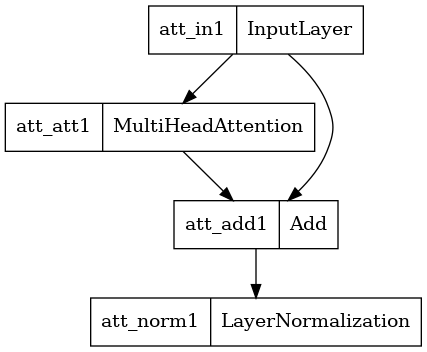

In [35]:
tf.keras.utils.plot_model(model)


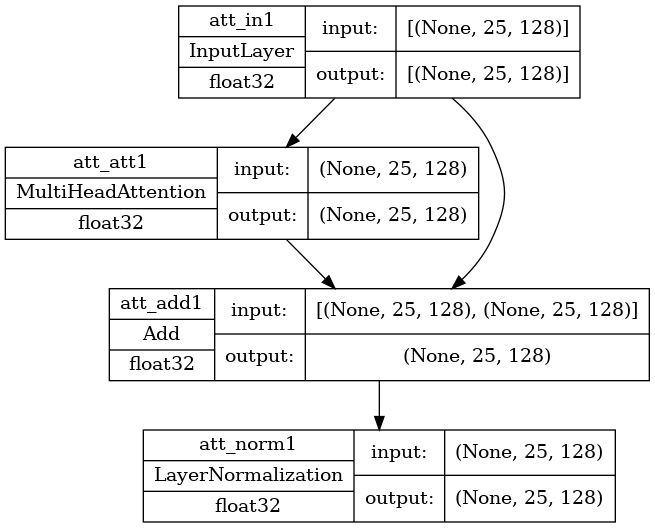

In [36]:

#more detailed one
tf.keras.utils.plot_model(model,show_shapes=True,show_dtype=True,show_layer_names=True,show_layer_activations=True)

In [37]:
#here we are getting only one input
#normalisationlayer which transforms all the input layers we are getting


In [38]:
def cross_attention(input_shape, context_shape, prefix='att', **kwargs):
    # Define inputs
    context = tf.keras.layers.Input(shape=context_shape, dtype='float32', name=f"{prefix}_ctx2") #context shape means the value which u are feeding to nenxt word(target value)
    inputs = tf.keras.layers.Input(shape=input_shape, dtype='float32', name=f'{prefix}_in2')

    # Multi-head attention layer
    attention = tf.keras.layers.MultiHeadAttention(name=f'{prefix}_att2', **kwargs) #Creates multi-head attention mechanism
    norm = tf.keras.layers.LayerNormalization(name=f'{prefix}_norm2')
    add = tf.keras.layers.Add(name=f'{prefix}_add2') # (adds original input to attention output)

    # Apply attention mechanism
    attout = attention(query=inputs, key=context, value=context)

    # Apply normalization and residual connection
    output = norm(add([attout, inputs]))

    # Create the model
    model = tf.keras.Model(inputs=[context, inputs], outputs=output, name=f'{prefix}_crs_at')

    return model

In [39]:
model=cross_attention(input_shape=(seq_length,key_dim),num_heads=num_heads,key_dim=key_dim,context_shape=(seq_length,key_dim))


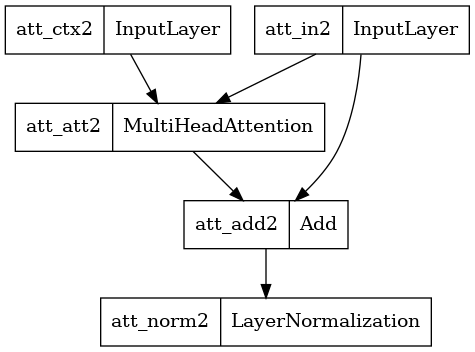

In [40]:
tf.keras.utils.plot_model(model) 


In [41]:
#here we are getting two input layers one is input and other is context ..
#both are sending data to multiheadedattention and to the addtional layer and then dats sent to normalosation layer

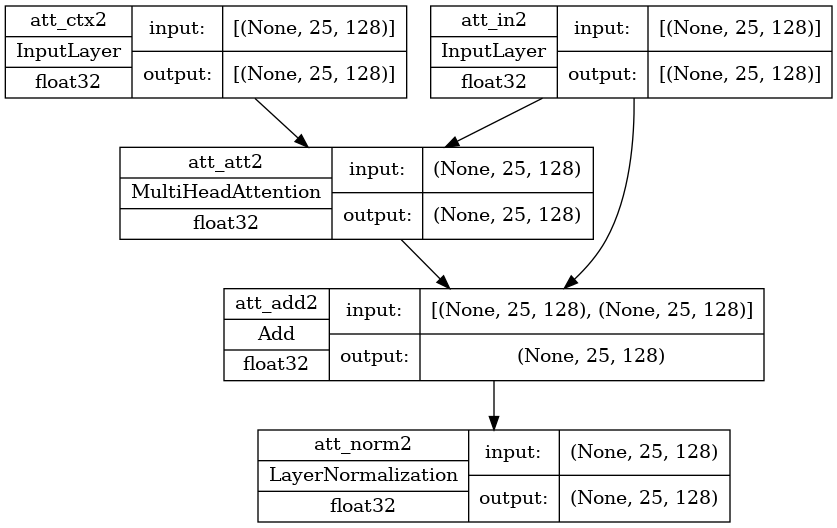

In [42]:
#more detailed one
tf.keras.utils.plot_model(model,show_shapes=True,show_dtype=True,show_layer_names=True,show_layer_activations=True) 


In [43]:
#difference between self and cross attention models
#self attention model process single type of data 
#cross attention model can combine one type of data with the other type of data(two inputs)

In [44]:
#feed forward layer
def feed_forward(input_shape, model_dim, ff_dim, dropout=.1, prefix='ff'):
    # Define inputs
    inputs = tf.keras.layers.Input(shape=input_shape, dtype='float32', name=f'{prefix}_in3')

    # Dense layers (they represents fully connected neural networks)
    dense1 = tf.keras.layers.Dense(ff_dim, name=f'{prefix}_ff1', activation='relu')
    dense2 = tf.keras.layers.Dense(model_dim, name=f'{prefix}_ff2')
    drop = tf.keras.layers.Dropout(dropout, name=f'{prefix}_drop')
    add = tf.keras.layers.Add(name=f"{prefix}_add3")    #additional layer
 
    # Apply feed-forward transformation
    ffout = drop(dense2(dense1(inputs)))

    # Layer normalization and residual connection
    norm = tf.keras.layers.LayerNormalization(name=f'{prefix}_norm3')
    output = norm(add([inputs, ffout]))

    # Create the model
    model = tf.keras.Model(inputs=inputs, outputs=output, name=f'{prefix}_ff')

    return model

In [45]:
 #ff_dim says how many neurons or layers etc
#dropout:0.1 represents we are dropping out the 10% of the information while passing data to next layer inorder to reduce the complexcity of the model
#the main purpose of adding dropout is it does not leads into overfitting model

In [46]:
ff_dim=512
model=feed_forward(input_shape=(seq_length,key_dim),model_dim=key_dim,ff_dim=ff_dim)


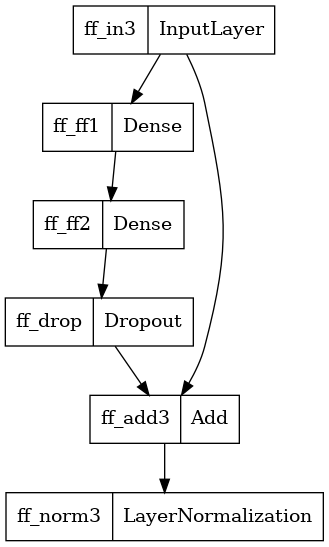

In [47]:
tf.keras.utils.plot_model(model)

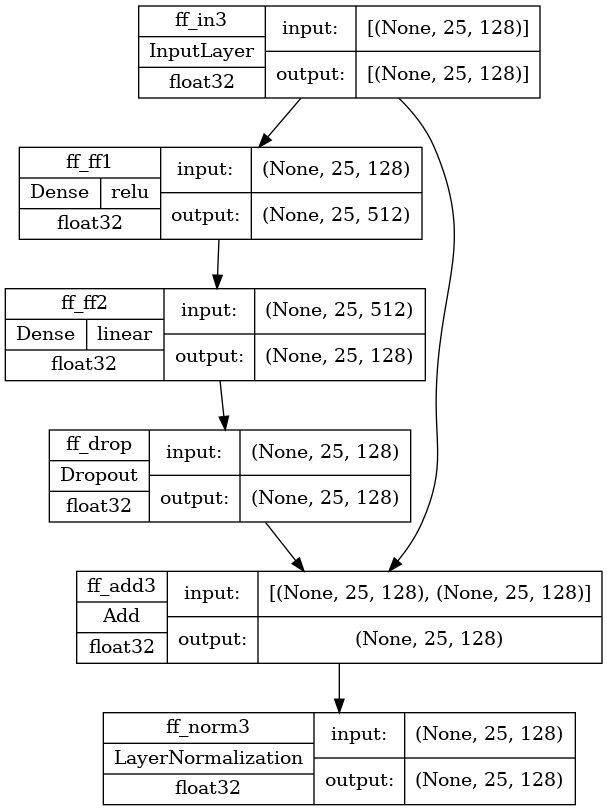

In [48]:
tf.keras.utils.plot_model(model,show_shapes=True,show_dtype=True,show_layer_names=True,show_layer_activations=True) 


In [49]:
#encoder and decoder


In [50]:
#in an encoder only self attention layer

In [51]:
import tensorflow as tf

def encoder(input_shape, key_dim, ff_dim, dropout=0.1, prefix='enc', **kwargs):
    # Define a Sequential model for the encoder
    model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=input_shape, dtype='float32', name=f'{prefix}_in0'), # Input layer
        self_attention(input_shape, prefix=prefix, key_dim=key_dim, mask=False, **kwargs), # Self-attention layer
        feed_forward(input_shape, key_dim, ff_dim, dropout, prefix) # Feed-forward layer
    ])

    return model


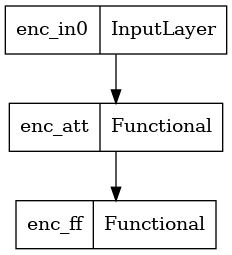

In [52]:
seq_length=25 #variables
key_dim=128
ff_dim=512
num_heads=8 # 8 heaaded model

model=encoder(input_shape=(seq_length,key_dim),key_dim=key_dim,ff_dim=ff_dim,num_heads=num_heads)
tf.keras.utils.plot_model(model)

In [53]:
#in a decoder there is both self and cross attention layer bcoz context is added along with input

In [54]:
def decoder(input_shape, key_dim, ff_dim, dropout=0.1, prefix='dec', **kwargs):
    # Define inputs for decoder
    inputs = tf.keras.layers.Input(shape=input_shape, dtype='float32', name=f'{prefix}_in0')
    context = tf.keras.layers.Input(shape=input_shape, dtype='float32', name=f'{prefix}_ctx0')
    
    # Self-attention and cross-attention layers
    att_model = self_attention(input_shape, key_dim=key_dim, mask=True, prefix=prefix, **kwargs)
    cross_model = cross_attention(input_shape, input_shape, key_dim=key_dim, prefix=prefix, **kwargs)
    
    # Feed-forward layer
    ff_model = feed_forward(input_shape, key_dim, ff_dim, dropout, prefix)

    # Connect layers
    x = att_model(inputs)
    x = cross_model([context, x])
    output = ff_model(x) 

    # Define decoder model
    model = tf.keras.Model(inputs=[inputs, context], outputs=output, name=prefix)

    return model

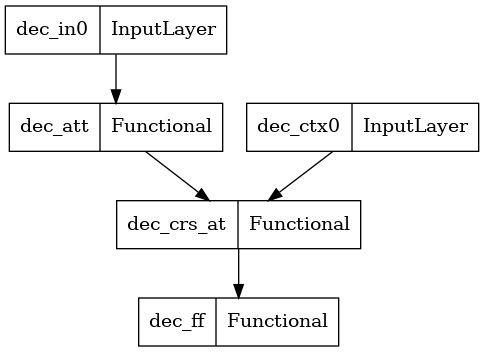

In [55]:
seq_length=25 #variables
key_dim=128
ff_dim=512
num_heads=8 # 8 heaaded model

model=decoder(input_shape=(seq_length,key_dim),key_dim=key_dim,ff_dim=ff_dim,num_heads=num_heads)
tf.keras.utils.plot_model(model)

In [56]:
#combining both encoder and decoder..(transformer)

In [57]:
def transformer(num_layers, num_heads, seq_length, key_dim, ff_dim, vocab_size_en, vocab_size_fr, dropout=0.1, name='transformer'):
    # Define encoder and decoder inputs
    input_enc = tf.keras.layers.Input(shape=(seq_length), dtype='int32', name='encode_inp')
    input_dec = tf.keras.layers.Input(shape=(seq_length), dtype='int32', name='decode_inp')

    # Positional embeddings for encoder and decoder inputs
    emb_enc = PositionalEmbedding(seq_length, vocab_size_en, key_dim, name='embed_enc')
    emb_dec = PositionalEmbedding(seq_length, vocab_size_fr, key_dim, name='embed_dec')

    # Create encoder and decoder layers
    encoders = [encoder(input_shape=(seq_length, key_dim), key_dim=key_dim, ff_dim=ff_dim, dropout=dropout, prefix=f"enc{i}", num_heads=num_heads)
                for i in range(num_layers)]
    decoders = [decoder(input_shape=(seq_length, key_dim), key_dim=key_dim, ff_dim=ff_dim, dropout=dropout, prefix=f"dec{i}", num_heads=num_heads)
                for i in range(num_layers)] 

    # Final dense layer
    final = tf.keras.layers.Dense(vocab_size_fr, name='linear')

    # Apply encoder and decoder layers to inputs
    x1 = emb_enc(input_enc) #embed source tokens
    x2 = emb_dec(input_dec) #embed target tokens
    for layer in encoders:
        x1 = layer(x1)
    for layer in decoders:   # Each decoder layer receives:
                              # 1. Previous decoder output
                              # 2. Final encoder outputs
        x2 = layer([x2, x1]) #encoder and decoder layers are connected to each other

    # Generate output
    output = final(x2)

    try:
        del output.keras_mask
    except:
        pass

    # Define transformer model
    model = tf.keras.Model(inputs=[input_enc, input_dec], outputs=output, name=name)

    return model

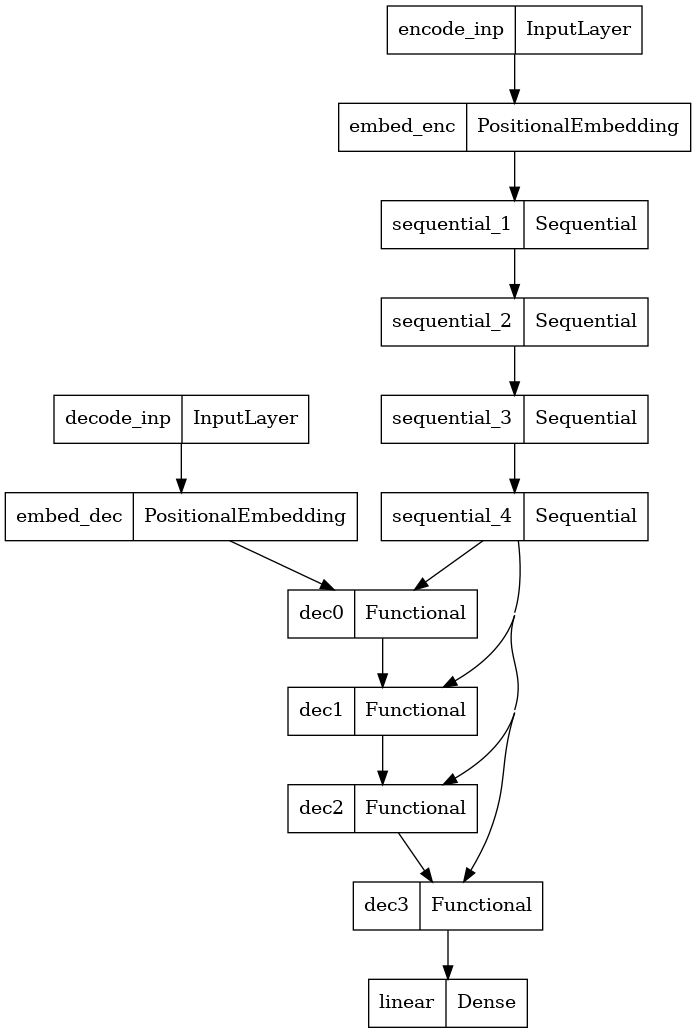

In [58]:
seq_lenghth=25
num_layers=4 #no of encoder and decoder layers
num_dim=128
ff_dim=512
dropout=.1
vocab_size_en=10000
vocab_size_fr=20000
model=transformer(num_layers,num_heads,seq_length,key_dim,ff_dim,vocab_size_en,vocab_size_fr,dropout)
tf.keras.utils.plot_model(model)
#tf.keras.utils.plot_model(model,show_dtype=True,show_layer_names=True,show_layer_activations=True)

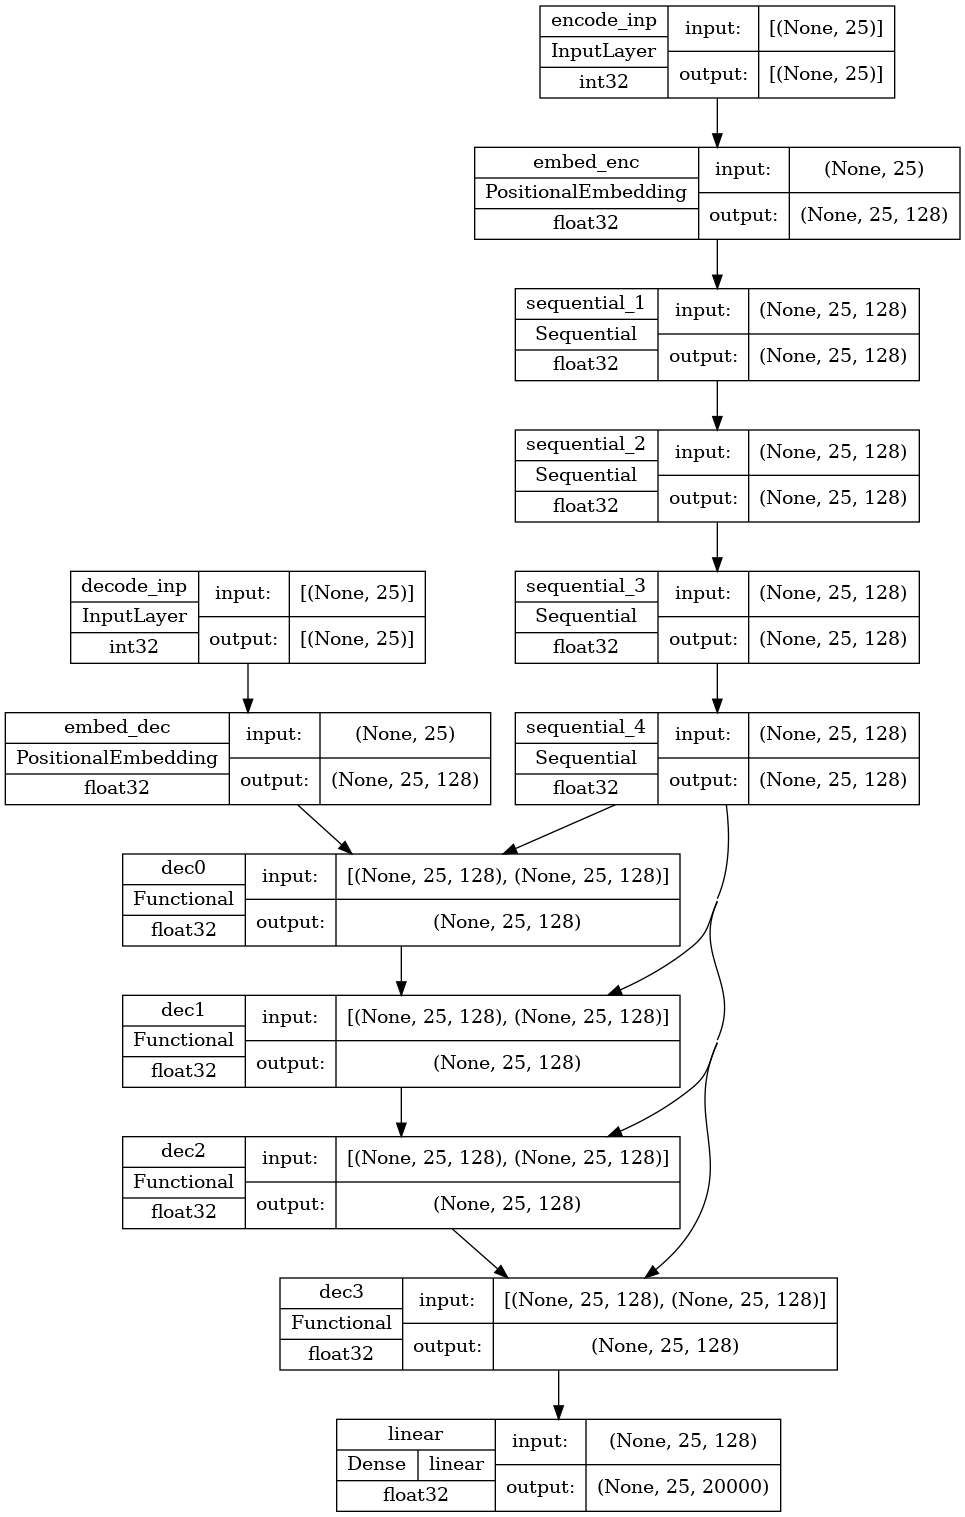

In [59]:
tf.keras.utils.plot_model(model,show_shapes=True,show_dtype=True,show_layer_names=True,show_layer_activations=True)

In [60]:
#compilation
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics="accuracy")
model.summary()

Model: "transformer"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 encode_inp (InputLayer)     [(None, 25)]                 0         []                            
                                                                                                  
 embed_enc (PositionalEmbed  (None, 25, 128)              1280000   ['encode_inp[0][0]']          
 ding)                                                                                            
                                                                                                  
 sequential_1 (Sequential)   (None, 25, 128)              659712    ['embed_enc[0][0]']           
                                                                                                  
 sequential_2 (Sequential)   (None, 25, 128)              659712    ['sequential_1[0][0]

In [ ]:
history=model.fit(train_ds,epochs=5,validation_data=test_ds)
#bcoz it takes more time for each epoch in the jupyter notebook with no gpu
#loss=12.33(12%) accuracy 0.0864 (not even 1%)for 1 epoch

Epoch 1/5


2025-06-29 13:45:38.727510: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 128000000 exceeds 10% of free system memory.
2025-06-29 13:45:38.951128: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 128000000 exceeds 10% of free system memory.
2025-06-29 13:45:39.049803: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 128000000 exceeds 10% of free system memory.
2025-06-29 13:45:39.165799: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 128000000 exceeds 10% of free system memory.
2025-06-29 13:45:39.497430: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 128000000 exceeds 10% of free system memory.


1828/1828 [==============================] - 6879s 4s/step - loss: 12.6996 - accuracy: 0.0234 - val_loss: 12.5307 - val_accuracy: 0.0159
Epoch 2/5
1828/1828 [==============================] - 7928s 4s/step - loss: 10.0124 - accuracy: 0.0024 - val_loss: 9.9035 - val_accuracy: 3.1516e-04
Epoch 3/5
 465/1828 [======>.......................] - ETA: 1:27:14 - loss: 9.9035 - accuracy: 7.0178e-05

In [ ]:
#after output
#the loss is not decresing and also there is no much change in accuracy..thats why we shouls use the custom methods

In [ ]:
#custom functions to improve our gpt model

In [ ]:
import tensorflow as tf

class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):

  def __init__(self, key_dim, warmup_steps=40000):
    super().__init__()
    self.key_dim = key_dim  # Embedding dimension (e.g., 128)
    self.warmup_steps = warmup_steps # Gradual warmup period
    self.d = tf.cast(self.key_dim, tf.float32) # Convert key_dim to float32 for math ops
     
  def __call__(self, step):     # 'step' is injected by Keras optimizer during training,step - it's part of Keras' training loop magic!



    # Convert step to float32
    step = tf.cast(step, dtype=tf.float32)
    # Calculate learning rate schedule (these are the formulas by research paper)
    arg1 = tf.math.rsqrt(step)
    arg2 = step * (self.warmup_steps ** -1.5)
    return tf.math.rsqrt(self.d) * tf.math.minimum(arg1, arg2)
         #Warmup Phase (step < warmup_steps):LR increases linearly (controlled by arg2)
        # Decay Phase (step ≥ warmup_steps):LR decreases proportionally to 1/sqrt(step) (controlled by arg1)


  def get_config(self):
    # Configuration for serialization
    config ={
      "key_dim": self.key_dim,
      "warmup_steps": self.warmup_steps
    }
    return config

# Define key dimension and create learning rate schedule
key_dim = 128 
lr_schedule = CustomSchedule(key_dim)
optimizer=tf.keras.optimizers.Adam(lr_schedule,beta_1=.9,beta_2=.98,epsilon=1e-9)

In [ ]:
#beta_1=0.9: Standard momentum for gradient descent
#beta_2=0.98: Higher than usual (0.999) to adapt better to LR changes
#epsilon=1e-9: Prevents division by zero in Adam updates


#learning rate refers to converge tho model into the best optimal case
Learning Rate
    ↑
    |     /\
    |    /  \
    |   /    \
    |  /      \
    | /        \
    +-----------→ Steps
     warmup_steps

In [ ]:
def masked_loss(label, pred):
  # Create mask for non-padded tokens
  mask = label != 0 # Boolean mask where True=real token, False=padding


  # Sparse categorical cross-entropy loss
  loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
      from_logits=True,  # Predictions are logits (not probabilities)
      reduction='none'   # Return loss per token, don't sum/average yet
  )
  loss = loss_object(label, pred)

  # Apply mask to loss
  mask = tf.cast(mask, dtype=loss.dtype)  # Convert bool→float (1.0/0.0)
  loss *= mask # Zero out padding positions

  # Compute average loss
  loss = tf.reduce_sum(loss) / tf.reduce_sum(mask)
  return loss

In [ ]:

#explaination to masked_loss
#applying the mask to loss
loss  = [0.12, 1.24, 0.45, 0.89]  # Original loss
mask  = [1.0,   1.0,   0.0,   0.0]  # As float32
loss *= mask → [0.12, 1.24, 0.0, 0.0]  # Masked loss
#average loss
sum(loss) = 0.12 + 1.24 = 1.36
sum(mask) = 1.0 + 1.0 = 2.0
final_loss = 1.36 / 2.0 = 0.68

In [ ]:
def mask_accuracy(label, pred):
  # Convert predictions to class labels
  pred = tf.argmax(pred, axis=2)  # Convert prediction probabilities to token IDs
  label = tf.cast(label, pred.dtype)  # Ensure label dtype matches predictions


  # Calculate match between labels and predictions
  match = label == pred

  # Apply mask to match
  mask = label != 0 # False where padding exists
  match = match & mask # Ignore padding positions

  # Compute accuracy 
  match = tf.cast(match, dtype=tf.float32) # Converts [True, False] → [1.0, 0.0]
  mask = tf.cast(mask, dtype=tf.float32)  # Converts [True, False] → [1.0, 0.0]
  return tf.reduce_sum(match) / tf.reduce_sum(mask)

In [ ]:
#explanation of mask accuracy
padding means 0's
ken Position	Label	Prediction	Is Padding?	Correct?	Counted in Accuracy?
1	             5	       5	      No	     ✓              Yes
tf.reduce_sum(match)  # Adds up all correct predictions
[1.0, 0.0, 1.0] → 2.0  # 2 correct predictions
tf.reduce_sum(mask)  # Counts all non-padding tokens
[1.0, 1.0, 0.0] → 2.0  # 2 correct predictions
Accuracy = (Sum of correct predictions) / (Sum of real tokens)
match_sum = 2.0  # 2 correct
mask_sum  = 3.0  # 3 real tokens
accuracy  = 2.0 / 3.0 ≈ 0.6667


In [ ]:
padding means 0's
ken Position	Label	Prediction	Is Padding?	Correct?	Counted in Accuracy?
1	             5	       5	      No	     ✓              Yes

In [ ]:
# Compile the model with custom loss and metrics
model.compile(loss=masked_loss, optimizer=optimizer, metrics=mask_accuracy)
model.summary()


In [ ]:

# Train the model
history = model.fit(train_ds, epochs=5, validation_data=test_ds)


In [ ]:
#by using the custom functions,now the loss is 8.9053(8.9%) and accuracy is 0.1184(11%) for 1 epoch
#for 20 epochs the finaal loss is 1.4% and accuracy is 74%

In [ ]:
#model testing

In [ ]:

import matplotlib.pyplot as plt

# Visualizing Training History
fig, axs = plt.subplots(2, figsize=(6, 8), sharex=True)
fig.suptitle('Training history') 

# Dynamically determine the number of epochs from the history object
epochs = range(1, len(history.history["loss"]) + 1) #Dynamically determines the number of epochs from the training history
axs[0].plot(epochs, history.history["loss"], alpha=0.5, label="loss")
axs[0].plot(epochs, history.history["val_loss"], alpha=0.5, label="val_loss")
axs[0].set_ylabel("Loss")
axs[0].legend(loc="upper right")
axs[1].plot(epochs, history.history["mask_accuracy"], alpha=0.5, label="mask_accuracy")
axs[1].plot(epochs, history.history["val_mask_accuracy"], alpha=0.5, label="val_mask_accuracy")
axs[1].set_ylabel("Accuracy")
axs[1].set_xlabel("Epoch")
axs[1].legend(loc="lower right")
plt.show()

In [ ]:
Creates 2 subplots stacked vertically (one for loss, one for accuracy)
Figure size: 6 inches wide × 8 inches tall
sharex=True: Both plots share the same x-axis (epoch numbers)

Plots:
Training loss (history.history["loss"])
Validation loss (history.history["val_loss"])
Styling:
alpha=0.5: Makes lines semi-transparent
Labels for legend

Plots:
Training accuracy (mask_accuracy)
Validation accuracy (val_mask_accuracy)



In [ ]:
def translate(sentence):
    # Encode input sentence
    enc_tokens = eng_vect([sentence])  #eng_vect converts English sentence to token IDs
    lookup = list(fra_vect.get_vocabulary()) #Uses French tokenizer (fra_vect) to process growing output ,# French vocabulary lookup table
    start_sent, end_sent = "[start]", "[end]"
    output_sent = [start_sent] # The decoder needs a starting token ([start]) to begin generation.

    for i in range(seq_length):#Generate one French token at a time, up to seq_length tokens.
        # Prepare decoder input
        vector = fra_vect([" ".join(output_sent)])
        assert vector.shape == (1, seq_length + 1)#Tokenize and Trim Last Token:The decoder input is always one token shorter than the target (teacher forcing format).
        dec_tokens = vector[:, :-1]
        assert dec_tokens.shape == (1, seq_length)
        # Generate predictions
        pred = model([enc_tokens, dec_tokens])
        assert pred.shape == (1, seq_len, vocab_size_fr)
        # Decode predicted token
        word = lookup[np.argmax(pred[0, i, :])]
        output_sent.append(word)
        if word == end_sent:
            break
    return output_sent

# Test the model on sample test cases
seq_length=25
vocab_size_en=10000
vocab_size_fr=20000
test_count = 20
for n in range(test_count):
    eng_sent, fre_sent = random.choice(test_pairs)
    translated = translate(eng_sent)
    print(f"Test case: {n}")
    print(f"English sentence: {eng_sent}")
    print(f"Translated sentence: {' '.join(translated)}")
    print(f"French sentence: {fre_sent}")
    print()

In [ ]:
#print(tf.config.list_physical_devices("GPU"))